In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [19]:
import numpy as np
import pandas as pd

In [20]:
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc, asc


In [22]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [24]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [27]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2c63d1df3c8>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [28]:
# Use the session to query Measurement table and display the first 5 trade volumes
for row in session.query(Measurement.station).limit(15).all():
    print(row)

('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)
('USC00519397',)


In [29]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [30]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2c63d1dff98>,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [31]:
# Use the session to query Dow table and display the first 5 trade volumes
for row in session.query(Station.station).limit(15).all():
    print(row)

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [32]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [33]:
#Explore the date data

results = session.query(Measurement.date, Measurement.station, Measurement.prcp, Measurement.tobs, Measurement.id).\
    order_by(Measurement.date.desc()).all()
[result for result in results[:10]]

#session.query(Measurement).order_by(desc(Measurement.date))
#[date for date, in session.query(Measurement.date)]

[('2017-08-23', 'USC00519397', 0.0, 81.0, 2724),
 ('2017-08-23', 'USC00514830', 0.0, 82.0, 7635),
 ('2017-08-23', 'USC00519523', 0.08, 82.0, 12187),
 ('2017-08-23', 'USC00516128', 0.45, 76.0, 19550),
 ('2017-08-22', 'USC00519397', 0.0, 82.0, 2723),
 ('2017-08-22', 'USC00519523', 0.0, 82.0, 12186),
 ('2017-08-22', 'USC00516128', 0.5, 76.0, 19549),
 ('2017-08-21', 'USC00519397', 0.0, 81.0, 2722),
 ('2017-08-21', 'USC00514830', 0.02, 79.0, 7634),
 ('2017-08-21', 'USC00519523', None, 82.0, 12185)]

In [34]:
#Test datetime and timedelta

#last_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#print(last_date)

#Perform a query to retrieve the data and precipitation scores

#last_12_months_test = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    #filter(func(date(Measurement.date) > last_date)
           
#results = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    #filter(Measurement.date > "2016-08-23")

#date = [result[0] for result in results]
#station = [result[1] for result in results]
#precip = [result[2] for result in results]


In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#### Calculate the date 1 year ago from the last data point in the database

current_date_list = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).limit(1).all()
#print(current_date_list)
last_date = dt.date(2017, 8, 23) - dt.timedelta(days=356)
#print(last_date)


#### Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.date > "2016-08-22")

date = [result[0] for result in results]
station = [result[1] for result in results]
precip = [result[2] for result in results]

#### Save the query results as a Pandas DataFrame and set the index to the date column

last_12_months = pd.DataFrame(list(zip(date,precip)),columns=['Date','Precipitation'])
#print(last_12_months.info())

#### Complete the call to convert the date column

#last_12_months['Date'] =  pd.to_datetime(last_12_months['Date'],
                              #format='%Y-%m-%d')

#last_12_months_filter = last_12_months[(last_12_months['Date'] > last_date)]
#last_12_months_filter.head()
#print(last_12_months_filter.info())
#last_12_months.head() 
#print(last_12_months.info())


#### Sort the dataframe by date

last_12_months_sort = last_12_months.sort_index(axis = 0, ascending=False)

# Remove the rows with missing data
#clean_last_12_months = last_12_months_sort.dropna(how="any")
#clean_last_12_months.count()

##### Set the index to the date column

last_12_months_final = last_12_months_sort.set_index('Date')
last_12_months_final.head()


,Precipitation
Date,
2017-08-23,0.45
2017-08-22,0.50
2017-08-21,0.56
2017-08-20,NaN
2017-08-19,0.09


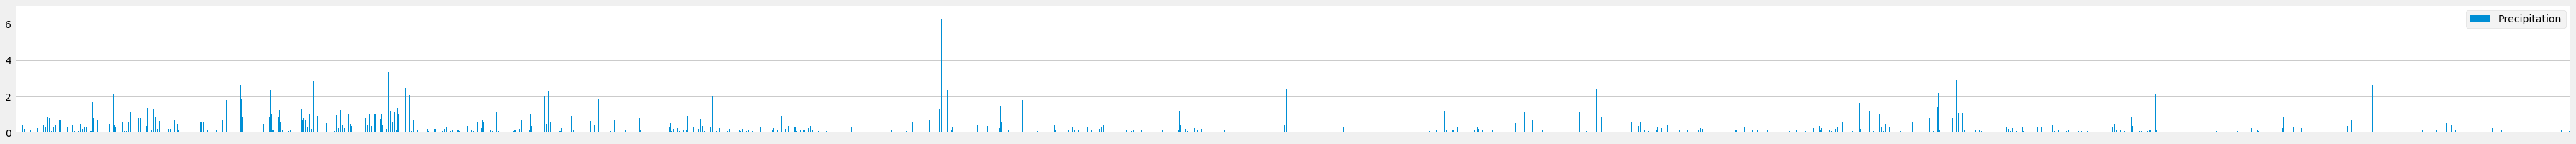

In [36]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = last_12_months_final.plot.bar(rot=0, figsize=(50,3))
ax.set_facecolor("white")
x_axis = ax.axes.get_xaxis()
x_label = x_axis.get_label()
#x_label.set_visible(False)
x_axis.set_visible(False)
#plt.axis('off')

plt.tight_layout()
plt.savefig("lastyearprecipitation.png")
plt.show()
plt.close()

![precipitation](Images/precipitation.png)

In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#last_12_months_final_sort.describe()

last_12_months_final.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [38]:
# Design a query to show how many stations are available in this dataset?

total_distinct_stations = session.query(Station.station).\
    group_by(Station.station).count()
print(f'Total Stations: {total_distinct_stations}')


Total Stations: 9


In [39]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()
 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).group_by(Measurement.station).\
    filter(Measurement.station.contains('USC00519281')).all()


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [48]:
# Choose the station with the highest number of temperature observations.
session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results2 = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.date > '2016-08-22',Measurement.station.contains('USC00519281')).all() 
    
date2 = [result[0] for result in results2]
station2 = [result[1] for result in results2]
tobs2 = [result[2] for result in results2]

#### Save the query results as a Pandas DataFrame and set the index to the date column

last_12_months_2 = pd.DataFrame(list(zip(date2,tobs2)),columns=['Date','Temperature'])
last_12_months_2.head()

#### Sort the dataframe by date

last_12_months_sort_2 = last_12_months_2.sort_index(axis = 0, ascending=False)

# Remove the rows with missing data
#clean_last_12_months = last_12_months_sort.dropna(how="any")
#clean_last_12_months.count()

##### Set the index to the date column

last_12_months_final_2 = last_12_months_sort_2.set_index('Date')
last_12_months_final_2.head()

,Temperature
Date,
2017-08-18,79.0
2017-08-17,76.0
2017-08-16,76.0
2017-08-15,77.0
2017-08-14,77.0


In [69]:
temp_frequency = last_12_months_final_2['Temperature'].value_counts()
print(temp_frequency)

74.0    39
76.0    33
75.0    33
77.0    31
72.0    22
78.0    22
70.0    22
69.0    19
73.0    18
71.0    18
79.0    18
67.0    15
68.0    12
80.0    11
65.0     7
62.0     6
66.0     5
81.0     4
63.0     4
59.0     3
64.0     3
82.0     3
60.0     2
83.0     1
61.0     1
Name: Temperature, dtype: int64


In [81]:
temp_frequency_df = pd.DataFrame({'Temperature':temp_frequency.index, 'Count':temp_frequency.values})
#temp_frequency_df.head()

##### Set the index to the date column
temp_frequency_index_df = temp_frequency_df.set_index('Temperature')
temp_frequency_index_df.head()

,Count
Temperature,
74.0,39
76.0,33
75.0,33
77.0,31
72.0,22


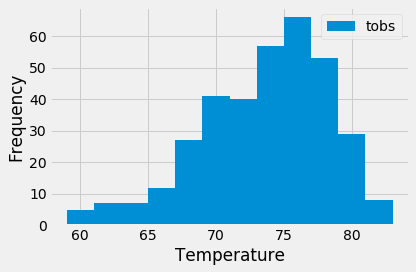

In [111]:
# Use Pandas Plotting with Matplotlib to plot the data
#ax = last_12_months_final_2['Temperature'].value_counts().hist(bins=12)
ax = last_12_months_final_2['Temperature'].hist(bins=12)
ax.legend(['tobs'])
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")
#plt.legend(['Red', 'Blue'])
plt.tight_layout()
plt.savefig("lastyearprecipitationforstation.png")
plt.show()
plt.close()

![precipitation](Images/station-histogram.png)

In [112]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [130]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    
    
# function usage example
trip_data = calc_temps('2017-01-01', '2017-01-12')
print(trip_data)

[(60.0, 68.23287671232876, 81.0)]


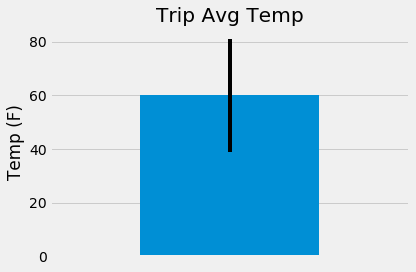

In [177]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_data_list = trip_data[0]
temp_min = trip_data_list[0]
temp_avg = trip_data_list[1]
temp_max = trip_data_list[2]
center = (temp_avg)/2
error_temp = temp_max - temp_min

trip_temps = pd.DataFrame({'Min': temp_min, 'Avg': temp_avg, 'Max': temp_max }, index=[0])
trip_temps

ax = trip_temps.plot.bar(x="Avg", y=0, yerr=error_temp, align='center', rot=0, legend=False)
plt.title('Trip Avg Temp')
x_axis = ax.axes.get_xaxis()
x_label = x_axis.get_label()
x_axis.set_visible(False)

y_axis = ax.axes.get_yaxis()
y_label = y_axis.get_label()
ax.yaxis.set_label_text('Temp (F)')
#plt.ylabel('Temp (F)')
plt.tight_layout()
plt.savefig("triptempbarchart.png")
plt.show()
plt.close()


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`


In [ ]:
    
# Unpack the `emoji_id` and `scores` from results and save into separate lists
#emoji_id = [result[1] for result in results[:10]]
#scores = [int(result[2]) for result in results[:10]]
#current_time = datetime.datetime.utcnow()

#ten_weeks_ago = current_time - datetime.timedelta(weeks=10)

#subjects_within_the_last_ten_weeks = session.query(Subject).filter(
    #Subject.time > ten_weeks_ago).all()

#####
#query_date = dt.date(2019, 4, 8) - dt.timedelta(days=7)
#print("Query Date: ", query_date)

##############

#current_date = datetime.date(2019, 4, 24)
#d = dt.date(2019, 4, 24) - dt.timedelta(days=180)

#dt.strptime(s,'%Y-%m-%d')

#datetime.datetime.strptime(s,'%Y-%m-%d')

#make a list of your datetimes
#lst = [d, d2]

#add one to each day in the list
#[x + datetime.timedelta(days =1) for x in lst]

#filter out dates from 2020 in list
#filter(lambda x: x < dt.datatime(2020, 1, 1), lst)

#help here:
#https://chrisalbon.com/python/basics/strings_to_datetime/
#ten_weeks_ago = current_time - datetime.timedelta(weeks=10)

#subjects_within_the_last_ten_weeks = session.query(Subject).filter(
    #Subject.time > ten_weeks_ago).all()

#recent_year = session.query(*).\
    #filter(func.strftime("%m", Dow.date) == "05")

    
    
#current_date = [item[0] for item in current_date_list]
#print(current_date)

#current_date_string = "".join(current_date)
#print(current_date_string)

#current_date_dt = dt.datetime.strptime(current_date_string,'%Y-%m-%d')
#print(current_date_dt)

#last_date_test = dt.date(current_date_string) - dt.timedelta(days=356)
#print(last_date_test)